#Why should I bother learning python?

<img src="images/cartoon.jpeg">

###Most coding languages have advantages for specific use cases... LOLCODE does not.
<img src="images/lolcode.png" width="50%" height="50%">
<img src="images/lolcode_example.png" width="50%" height="50%">
###This lecture will be addressing the advantages of python for bioinformatics data analysis coding environments.

###Fast Development
* script language
* dynamic typing
* built in high level data types
* huge standard library
<img src="images/java.png" width="50%" height="50%"><img src="images/python.png" width="50%" height="50%">

###Very little overhead
* no compile setup - write your code in my_program.py and run it with python my_program.py
* no memory management

###Community support
* huge bioinformatics toolset of libraries built in python
* most of your questions will already be anwered on stack overflow
* most of your colleagues will code in python, so sharing code will be simplier 
* integrates well with other languages

<img src="images/community.png">

###Readability
* easy to intepret what you are doing based on code

###Drawbacks
* programs can run slower
* less flexibility


#"I would love to be able to interact with this code as Rachel talks... How can I do that?"

You're in luck! iPython (which stands for "interactive Python") has a notebook format which is easy to open and edit.

###To Open:
If you have downloaded the Anaconda distribution, you should already have ipython notebooks at your commandline.

To check if you are using the Anaconda distribution, type the following at the command line:
```
$ which python
```

The response should be something like the following:
```
/Applications/anaconda/bin/python
```

Clone into my github repository:
```
git clone https://github.com/Rachelmarty20/bootcamp.git
```

Move into the direcory:
```
cd bootcamp
```

Next, open an ipython notebook:
```
$ ipython notebook
```
<img src="images/ipy_notebook_start.png">

Select the "Introduction to Python - Cancer Variant Classification" notebook.

###To Edit:

Double click on any cell.

### To Run:

Select Cell -> Run from menu or click triangle or learn <a href="http://johnlaudun.org/20131228-ipython-notebook-keyboard-shortcuts/">shortcuts</a>.

#Cancer Variant Classification

Cancer is caused by variations in the genome. However, patients have thousands of germline variants and hundreds of somatic mutations. 

###Can we predict which somatic mutations "drive" cancer and which are just "passengers"?

We will be working with The Cancer Genome Atlast (TCGA), which is a large cancer data set used in lots of cancer research. 

<img src="images/tcga.jpg">

##Let's start by getting the mutation calls

These are stored in Mutation Annotation Format (MAF). Shout out to <a href="https://github.com/theandygross/TCGA">Andy Gross</a> for some of this code.

###Warning:
Here I download updated clinical data from the TCGA Data Portal. This is a secure site which uses HTTPS. I had to give it a path to my ca-cert for the download to work. Download a copy of a generic cacert.pem [here](http://curl.haxx.se/ca/cacert.pem).

In [123]:
PATH_TO_CACERT = 'cacert.pem'

####os - a standard library that fascilitates communication with the operating system

In [124]:
import os
out_path = 'mafs'
if not os.path.isdir(out_path):
    os.makedirs(out_path)

In [125]:
maf_dashboard = 'https://confluence.broadinstitute.org/display/GDAC/MAF+Dashboard'

####'!' allows you to write bash directly to the command line;  python variables can be used with the '$' symbol

In [126]:
! curl --cacert {PATH_TO_CACERT} {maf_dashboard} -o mafs/tmp.html

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  190k    0  190k    0     0  92577      0 --:--:--  0:00:02 --:--:-- 92593


####bs4 (BeautifulSoup) - a library for parsing HTML and XML files

In [127]:
from bs4 import BeautifulSoup
f = open('mafs/tmp.html', 'rb').read()
soup = BeautifulSoup(f)

In [128]:
r = [l.get('href') for l in soup.find_all('a')
   if l.get('href') != None
   and '.maf' in l.get('href')]

####Note: we are only using one of the maf files for the sake of this lecture because it takes a while to download all of them

In [129]:
a_maf_file = r[20]
print a_maf_file

https://tcga-data.nci.nih.gov/tcgafiles/ftp_auth/distro_ftpusers/anonymous/tumor/chol/gsc/broad.mit.edu/illuminaga_dnaseq_automated/mutations/broad.mit.edu_CHOL.IlluminaGA_DNASeq_automated.Level_2.1.0.0/CHOL_pairs.aggregated.capture.tcga.uuid.automated.somatic.maf


In [130]:
! curl $a_maf_file > mafs/a_maf_file.tsv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4043k  100 4043k    0     0  1887k      0  0:00:02  0:00:02 --:--:-- 1887k


##Detour:
###pandas - library for high performance data structures and data analysis 

<img src="images/pandas_real.jpg">


(will likely become your best friend - bite the bullet and learn how to use it as soon as possible)

###Some things to know about pandas before we dive in:

* It is built on top of numpy (numerical python), which allows you to do some fancy things with numbers and sequences

In [196]:
import numpy as np
# a one dimensional array
x = np.array([2, 7, 5])
print 'x:', x

x: [2 7 5]


In [197]:
# a sequence starting from 4 to 12 with a step size of 3
y = np.arange(4, 12, 3)
print 'y:', y

y: [ 4  7 10]


In [198]:
# element-wise operations on arrays
print 'x + y:', x + y
print 'x / y:', x / y
print 'x ^ y:', x ** y 

x + y: [ 6 14 15]
x / y: [0 1 0]
x ^ y: [     16  823543 9765625]


* it also integrates well with scipy (scientific python), which will be your best resource for any complex statistics
* let's also just introduce matplotlib while we are at it - pyplot is one of the most popular plotting tools in python

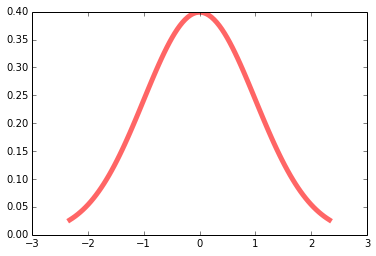

In [199]:
from scipy.stats import norm
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x), 'r-', lw=5, alpha=0.6, label='norm pdf')

##Now back to our cancer variants. Let's use pandas to get them into a dataframe.

In [200]:
import pandas as pd
maf_df = pd.read_csv('mafs/a_maf_file.tsv', sep='\t', header=0, skiprows= 4, comment='#')
maf_df.head()

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_position,End_position,Strand,Variant_Classification,Variant_Type,...,t_ref_count,validation_alt_allele,validation_method,validation_status,validation_tumor_sample,pox,qox,pox_cutoff,isArtifactMode,oxoGCut
0,IL10RA,3587,broad.mit.edu,37,11,117869604,117869604,+,Missense_Mutation,SNP,...,23,NaN,NaN,NaN,NaN,0.004672,0.005779,0.004672,1,0
1,TRMT5,57570,broad.mit.edu,37,14,61446086,61446086,+,Missense_Mutation,SNP,...,34,NaN,NaN,NaN,NaN,0.000000,0.000000,0.001984,0,0
2,NT5C1B,93034,broad.mit.edu,37,2,18766068,18766068,+,Silent,SNP,...,36,NaN,NaN,NaN,NaN,0.000000,0.000000,0.012319,0,0
3,EVPL,2125,broad.mit.edu,37,17,74003247,74003247,+,Silent,SNP,...,36,NaN,NaN,NaN,NaN,0.000000,0.000000,0.004672,0,0
4,ERBB2,2064,broad.mit.edu,37,17,37880219,37880219,+,Silent,SNP,...,11,NaN,NaN,NaN,NaN,0.000000,0.000000,0.006214,0,0


####Now we have all of our somatic mutations.

(If you haven't figured out the cacert.pem thing, here's an alternative so we can all stay together during the lecture. I am going to output the dataframe to a file and include the file in your folder.)

In [201]:
maf_df.to_csv('mafs/another_maf_file.tsv', sep='\t', index=False)

####Importing directly from a given file in the folder to get the same dataframe

In [202]:
maf_df = pd.read_csv('mafs/another_maf_file.tsv', sep='\t', header=0, comment='#')
maf_df.head()

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_position,End_position,Strand,Variant_Classification,Variant_Type,...,t_ref_count,validation_alt_allele,validation_method,validation_status,validation_tumor_sample,pox,qox,pox_cutoff,isArtifactMode,oxoGCut
0,IL10RA,3587,broad.mit.edu,37,11,117869604,117869604,+,Missense_Mutation,SNP,...,23,NaN,NaN,NaN,NaN,0.004672,0.005779,0.004672,1,0
1,TRMT5,57570,broad.mit.edu,37,14,61446086,61446086,+,Missense_Mutation,SNP,...,34,NaN,NaN,NaN,NaN,0.000000,0.000000,0.001984,0,0
2,NT5C1B,93034,broad.mit.edu,37,2,18766068,18766068,+,Silent,SNP,...,36,NaN,NaN,NaN,NaN,0.000000,0.000000,0.012319,0,0
3,EVPL,2125,broad.mit.edu,37,17,74003247,74003247,+,Silent,SNP,...,36,NaN,NaN,NaN,NaN,0.000000,0.000000,0.004672,0,0
4,ERBB2,2064,broad.mit.edu,37,17,37880219,37880219,+,Silent,SNP,...,11,NaN,NaN,NaN,NaN,0.000000,0.000000,0.006214,0,0


####Some of the columns appear to be cut off, let's look at the complete list

In [203]:
list(maf_df.columns)

['Hugo_Symbol',
 'Entrez_Gene_Id',
 'Center',
 'NCBI_Build',
 'Chromosome',
 'Start_position',
 'End_position',
 'Strand',
 'Variant_Classification',
 'Variant_Type',
 'Reference_Allele',
 'Tumor_Seq_Allele1',
 'Tumor_Seq_Allele2',
 'dbSNP_RS',
 'dbSNP_Val_Status',
 'Tumor_Sample_Barcode',
 'Matched_Norm_Sample_Barcode',
 'Match_Norm_Seq_Allele1',
 'Match_Norm_Seq_Allele2',
 'Tumor_Validation_Allele1',
 'Tumor_Validation_Allele2',
 'Match_Norm_Validation_Allele1',
 'Match_Norm_Validation_Allele2',
 'Verification_Status',
 'Validation_Status',
 'Mutation_Status',
 'Sequencing_Phase',
 'Sequence_Source',
 'Validation_Method',
 'Score',
 'BAM_file',
 'Sequencer',
 'Tumor_Sample_UUID',
 'Matched_Norm_Sample_UUID',
 'Genome_Change',
 'Annotation_Transcript',
 'Transcript_Strand',
 'Transcript_Exon',
 'Transcript_Position',
 'cDNA_Change',
 'Codon_Change',
 'Protein_Change',
 'Other_Transcripts',
 'Refseq_mRNA_Id',
 'Refseq_prot_Id',
 'SwissProt_acc_Id',
 'SwissProt_entry_Id',
 'Description'

####Let's restrict the number of columns to those useful to us. This will make the dataframe more managable (and aestheically pleasing).

In [204]:
maf_df2 = maf_df[['Hugo_Symbol', 'Chromosome', 'Start_position', 
         'End_position', 'Strand', 'Reference_Allele', 
         'Tumor_Seq_Allele1', 'Tumor_Seq_Allele2',
         'Tumor_Sample_Barcode', 'Entrez_Gene_Id',
         'Variant_Classification','Variant_Type']]
maf_df2.head()

,Hugo_Symbol,Chromosome,Start_position,End_position,Strand,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,Tumor_Sample_Barcode,Entrez_Gene_Id,Variant_Classification,Variant_Type
0,IL10RA,11,117869604,117869604,+,C,C,A,TCGA-4G-AAZO-01A-12D-A417-09,3587,Missense_Mutation,SNP
1,TRMT5,14,61446086,61446086,+,T,T,C,TCGA-4G-AAZO-01A-12D-A417-09,57570,Missense_Mutation,SNP
2,NT5C1B,2,18766068,18766068,+,G,G,A,TCGA-4G-AAZO-01A-12D-A417-09,93034,Silent,SNP
3,EVPL,17,74003247,74003247,+,C,C,T,TCGA-4G-AAZO-01A-12D-A417-09,2125,Silent,SNP
4,ERBB2,17,37880219,37880219,+,T,T,C,TCGA-4G-AAZO-01A-12D-A417-09,2064,Silent,SNP


####We want to know if mutation has occured in both strands or only one. We apply a function to the pandas dataframe to get this information.

In [205]:
def check_bi_allelic(x):
    if x[0] == x[1]:
        return True
    else:
        return False
maf_df2["Both_Alleles"] = maf_df2[['Tumor_Seq_Allele1', 'Tumor_Seq_Allele2']].apply(check_bi_allelic, axis=1)

####Only the first 12 characters of the 'Tumor_Sample_Barcode' are relevant to the patient, so let's extract those characters.

In [206]:
maf_df2['Patient_Barcode'] = maf_df2.Tumor_Sample_Barcode.str[:12]

####And then simplify the dataframe again...

In [207]:
maf_df3 = maf_df2[['Hugo_Symbol', 'Entrez_Gene_Id', 'Patient_Barcode', 'Variant_Classification', 'Both_Alleles', 'Start_position']]
maf_df3 = maf_df3[maf_df3.Entrez_Gene_Id != 0]
maf_df3.head()

,Hugo_Symbol,Entrez_Gene_Id,Patient_Barcode,Variant_Classification,Both_Alleles,Start_position
0,IL10RA,3587,TCGA-4G-AAZO,Missense_Mutation,False,117869604
1,TRMT5,57570,TCGA-4G-AAZO,Missense_Mutation,False,61446086
2,NT5C1B,93034,TCGA-4G-AAZO,Silent,False,18766068
3,EVPL,2125,TCGA-4G-AAZO,Silent,False,74003247
4,ERBB2,2064,TCGA-4G-AAZO,Silent,False,37880219


##Let's explore the data a little bit!

####How many patients are there?

In [208]:
len(maf_df3.Patient_Barcode.unique())

36

####How many rows (mutations) are in our dataframe?

In [209]:
maf_df3.count()

Hugo_Symbol               3628
Entrez_Gene_Id            3628
Patient_Barcode           3628
Variant_Classification    3628
Both_Alleles              3628
Start_position            3628
dtype: int64

####Do we have any mutations in TP53?

In [145]:
maf_df3[maf_df3.Hugo_Symbol == 'TP53']

,Hugo_Symbol,Entrez_Gene_Id,Patient_Barcode,Variant_Classification,Both_Alleles,Start_position
1330,TP53,7157,TCGA-3X-AAVB,Missense_Mutation,False,7577539
1376,TP53,7157,TCGA-W5-AA2I,Missense_Mutation,False,7578509
1457,TP53,7157,TCGA-W5-AA2I,Missense_Mutation,False,7578509
3697,TP53,7157,TCGA-3X-AAVC,Missense_Mutation,False,7577559
3735,TP53,7157,TCGA-W5-AA2O,Frame_Shift_Del,False,7577554
3736,TP53,7157,TCGA-W5-AA2O,Frame_Shift_Ins,False,7577579
3757,TP53,7157,TCGA-W5-AA2O,Frame_Shift_Del,False,7577554
3758,TP53,7157,TCGA-W5-AA2O,Frame_Shift_Ins,False,7577579


####Next, we save the dataframe as a csv file (just for fun). How easy is that?? 

In [195]:
maf_df3.to_csv('mafs/a_maf_file.concise.csv')

####How many mutations do each of the patients have?

##### '%matplotlib inline' is a magic function that allows you to do all of your plotting inside an ipython notebook

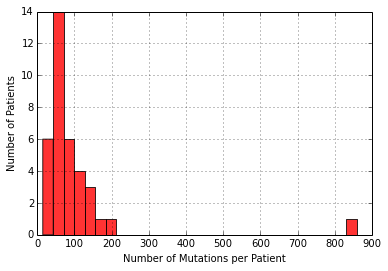

In [147]:
%matplotlib inline
ax = maf_df3.Patient_Barcode.value_counts().hist(color='r', alpha=0.8, bins=30)
ax.set_xlabel("Number of Mutations per Patient")
ax.set_ylabel("Number of Patients")

#### Why is there so much variation??

According to Lawrence et al. 2013 in Nature, different cancer types have vastly different distributions of mutations.

<img src="images/nature12213-f1.2.jpg">

####What kinds of mutations are we dealing with?

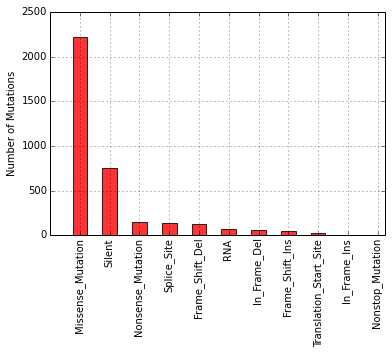

In [148]:
ax = maf_df3.Variant_Classification.value_counts().plot(kind='bar', color='r', alpha=0.8)
ax.set_ylabel("Number of Mutations")

####Which genes are most frequently mutated?

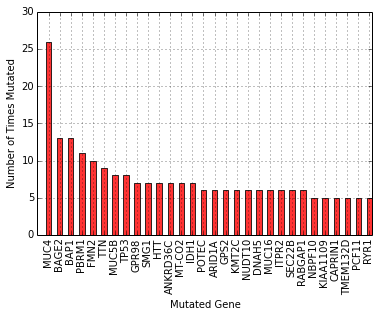

In [149]:
ax = maf_df3['Hugo_Symbol'].value_counts()[:30].plot(kind='bar', color='r', alpha=0.8)
ax.set_xlabel("Mutated Gene")
ax.set_ylabel("Number of Times Mutated")

#Let's get some genetic interaction information about our genes...

#### In order to use machine learning to predict our "driver" genes, we need to create a useful feature vector. The best predicting algorithms use many features - we are going to use three fairly simple ones. One feature will be the possible disruption of a gene as measured by the number of other genes in which it interacts.

####<a href="http://www.functionalnet.org/humannet">Human Net</a> is a probabilistic functional gene network of nearly 20,000 validated protein coding genes constructed by the integration of 21 'omics' data types.

####Picture something like this:

<img src="images/gene_network.jpg">

####The human net data is stored in a txt file in our folder. Let's read it. For each gene, let's create a list of its connections. 

In [150]:
edges = {}
with open('data/HumanNet.v1.join.txt', 'r') as human_net:
    for line in human_net:
        c = [x for x in line.strip().split("\t")]
        one = int(c[0])
        two = int(c[1])
        
        if one in edges:
            edges[one].append(two)
        else:
            edges[one] = [two]
        if two in edges:
            edges[two].append(one)
        else:
            edges[two] = [one]


####Is it possible to save a dictionary? Yes! Pickle!
* Pickle can be used for any serializable object; however, it does not compress the object

In [151]:
import cPickle as pickle
pickle.dump(edges, open("pickles/edges.p", 'wb'))

####We can load the pickle file and get the exact same object back in python.

In [152]:
import cPickle as pickle
edges = pickle.load(open("pickles/edges.p", 'rb'))

####What does the distribution of edge numbers look like in human net?

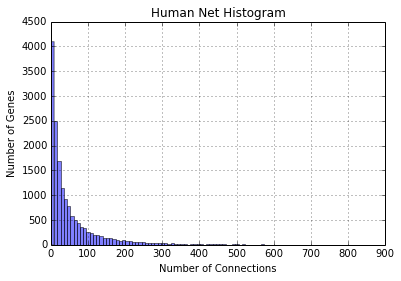

In [153]:
connect = map(len, edges.values())

n, bins, patches = plt.hist(connect, bins=100, alpha=0.5)
plt.xlabel('Number of Connections')
plt.ylabel('Number of Genes')
plt.title('Human Net Histogram')
plt.grid(True)

#Now that we have a fancy network feature, let's create a couple other simple features.

####How often is the gene mutated in TCGA? If a gene is mutated more frequently, it could mean that there is selective pressure toward mutation.

In [194]:
mutations = pd.DataFrame(maf_df3.Entrez_Gene_Id.value_counts())
mutations = mutations.reset_index()
mutations.columns = ['Entrez_Gene_Id', 'counts']
mutations.head()

,Entrez_Gene_Id,counts
0,4585,26
1,85319,13
2,8314,13
3,55193,11
4,56776,10


####Let's also add a feature based on the percentage of time a mutation is bi-allelic. (this may be unreliable in TCGA due to mutation calling, but let's use it anyway).

In [244]:
maf_df3.head()

,Hugo_Symbol,Entrez_Gene_Id,Patient_Barcode,Variant_Classification,Both_Alleles,Start_position
0,IL10RA,3587,TCGA-4G-AAZO,Missense_Mutation,False,117869604
1,TRMT5,57570,TCGA-4G-AAZO,Missense_Mutation,False,61446086
2,NT5C1B,93034,TCGA-4G-AAZO,Silent,False,18766068
3,EVPL,2125,TCGA-4G-AAZO,Silent,False,74003247
4,ERBB2,2064,TCGA-4G-AAZO,Silent,False,37880219


In [245]:
grouped = maf_df3.groupby('Entrez_Gene_Id')
num_bi_allelic = grouped.apply(lambda g: g[g['Both_Alleles'] == False].count())['Patient_Barcode']
num_total = grouped['Patient_Barcode'].agg('count')

####Thanks to numpy, we can divide these series by each other. Then we can add the new series to our mutations dataframe.

In [246]:
mutations['Perc_Bi_Allelic'] = pd.Series(bi_all)/pd.Series(total)
mutations.head()

,Entrez_Gene_Id,counts,Perc_Bi_Allelic
0,4585,26,0
1,85319,13,0
2,8314,13,0
3,55193,11,0
4,56776,10,0


In [247]:
mutations.to_csv('data/mutations.csv')

####Here, we import a txt file containing a density score for each gene that can be derived from our human net analysis. We are going to spare the details because of time and just import it. 

In [248]:
densities = pd.read_csv('data/density_values.txt', sep=' ', header=None)

In [249]:
densities.columns = ["Entrez_Gene_Id", "Density"]
densities.head()

,Entrez_Gene_Id,Density
0,673,1298.9
1,2312,135.1
2,4893,1736.6
3,113146,NaN
4,94025,14.2


#####Merging pandas dataframes is quite handy (and fast)! Check out all of the ways they can be combined <a href="http://pandas.pydata.org/pandas-docs/stable/merging.html">here</a>.

In [250]:
mutations = pd.merge(mutations, densities, on='Entrez_Gene_Id', how='outer')
mutations.head()

,Entrez_Gene_Id,counts,Perc_Bi_Allelic,Density
0,4585,26,0,234.3
1,85319,13,0,0.2
2,8314,13,0,NaN
3,55193,11,0,NaN
4,56776,10,0,292.2


In [251]:
mutations = mutations[["Entrez_Gene_Id", "counts", "Perc_Bi_Allelic", "Density"]]
mutations.to_csv('data/tcga_feature_vector.csv')

# In order to train our classifier, we need some truth data. 

####This data was taken from the Cosmic database. It has already been formatted like our TCGA data. We have a training and validation set for both cancer (driver) genes and neutral (passenger) genes.

In [252]:
cancer_feature_vector_training = pd.read_csv('data/cancer_feature_vector_tcga_training.csv', index_col=0)
neutral_feature_vector_training = pd.read_csv('data/neutral_feature_vector_tcga_training.csv', index_col=0)
cancer_feature_vector_validation = pd.read_csv('data/cancer_feature_vector_tcga_validation.csv', index_col=0)
neutral_feature_vector_validation = pd.read_csv('data/neutral_feature_vector_tcga_validation.csv', index_col=0)

In [253]:
cancer_feature_vector_training.head()

,Entrez_Gene_Id,counts,Perc_Bi_Allelic,Density
0,673,480,0.508333,1298.9
259,4893,54,0.500000,1736.6
297,3265,24,0.541667,1824.5
918,3845,4,0.500000,1794.8
1020,207,4,0.500000,1572.9


####Here, we manipulate the training set to form a numpy matrix. This will be a better input format for our classifier.

In [254]:
cancer_feature_vector_training = cancer_feature_vector_training.fillna(0)
cancer_matrix = cancer_feature_vector_training.values[:,1:].astype(float)
neutral_feature_vector_training = neutral_feature_vector_training.fillna(0)
neutral_matrix = neutral_feature_vector_training.values[:,1:].astype(float)
training_matrix = np.concatenate((cancer_matrix, neutral_matrix), axis=0)
training_assignments = [1 for gene in range(len(cancer_matrix))] + [0 for gene in range(len(neutral_matrix))]

####And we do the same thing for the validation sets.

In [255]:
cancer_feature_vector_validation = cancer_feature_vector_validation.fillna(0)
cancer_matrix = cancer_feature_vector_validation.values[:,1:].astype(float)
neutral_feature_vector_validation = neutral_feature_vector_validation.fillna(0)
neutral_matrix = neutral_feature_vector_validation.values[:,1:].astype(float)
validation_matrix = np.concatenate((cancer_matrix, neutral_matrix), axis=0)
validation_key = [1 for gene in range(len(cancer_matrix))] + [0 for gene in range(len(neutral_matrix))]

####Let's also reformat our tcga gene data while we are at it.

In [256]:
tcga_feature_vector = mutations.copy()
tcga_feature_vector = tcga_feature_vector.dropna()
tcga_matrix = tcga_feature_vector.values[:,1:].astype(float)

####The data looks a little bit different now.

In [257]:
print tcga_matrix

[[  2.60000000e+01   0.00000000e+00   2.34300000e+02]
 [  1.30000000e+01   0.00000000e+00   2.00000000e-01]
 [  1.00000000e+01   0.00000000e+00   2.92200000e+02]
 ..., 
 [  1.00000000e+00   0.00000000e+00   4.00500000e+02]
 [  1.00000000e+00   0.00000000e+00   4.41100000e+02]
 [  1.00000000e+00   0.00000000e+00   6.34000000e+02]]


####Let's use a Random Forest to classify our mutated genes.

#####Scikit-learn: a library for machine learning in python

In [258]:
import sklearn as sk
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, min_samples_leaf=5)
clf = clf.fit(training_matrix, training_assignments)

In [259]:
output = clf.predict(tcga_matrix)

####We can save our classifier to be used later using scikit's joblib.

In [260]:
from sklearn.externals import joblib
save = joblib.dump(clf, 'classifiers/random_forest.pkl') 

####This is how we would re-load it.

In [261]:
clf = joblib.load('classifiers/random_forest.pkl') 

####Scikit-learn can tell us how confident it is...

In [262]:
confidence = clf.predict_proba(tcga_matrix)

In [263]:
print confidence

[[ 0.5075  0.4925]
 [ 0.5075  0.4925]
 [ 0.5075  0.4925]
 ..., 
 [ 0.5075  0.4925]
 [ 0.5075  0.4925]
 [ 0.5075  0.4925]]


####Okay, so this classifier kinda sucks. Let's continue anyway.

In [264]:
print list(output).count(0)
print list(output).count(1)

424
102


####It performs pretty well on our TINY validation set though. Can anyone guess why?

In [265]:
validation_predictions = clf.predict(validation_matrix)
print list(validation_predictions)
print validation_key

[1, 1, 0, 0, 0]
[1, 1, 0, 0, 0]


####Here's some information about the driver genes and the passenger genes

In [266]:
cancer_feature_vector = pd.concat([cancer_feature_vector_training, cancer_feature_vector_validation])
cancer_feature_vector.describe()

,Entrez_Gene_Id,counts,Perc_Bi_Allelic,Density
count,8.00000,8.000000,8.000000,8.000000
mean,5913.25000,71.375000,0.443750,1527.862500
std,7355.63323,166.122964,0.179878,280.582572
min,207.00000,1.000000,0.000000,1035.300000
25%,2617.00000,2.000000,0.500000,1320.200000
50%,4369.00000,4.000000,0.500000,1602.750000
75%,5399.50000,31.500000,0.502083,1751.150000
max,23405.00000,480.000000,0.541667,1824.500000


In [267]:
neutral_feature_vector = pd.concat([neutral_feature_vector_training, neutral_feature_vector_validation])
neutral_feature_vector.describe()

,Entrez_Gene_Id,counts,Perc_Bi_Allelic,Density
count,9.000000,9.000000,9,9.000000
mean,98423.777778,2.777778,1,249.322222
std,143824.453413,1.922094,0,367.367816
min,143.000000,1.000000,1,0.000000
25%,2312.000000,1.000000,1,1.500000
50%,5545.000000,3.000000,1,97.700000
75%,113146.000000,4.000000,1,212.700000
max,388646.000000,6.000000,1,1030.300000


####Density appears to be the big differentiator. Let's plot it to get a better idea.

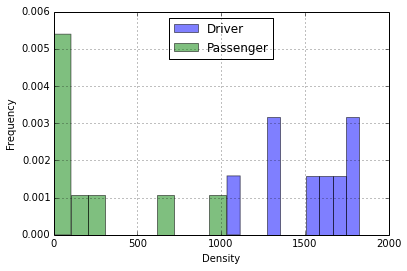

In [268]:
ax = cancer_feature_vector.Density.hist(normed=True, alpha=0.5, color='b', label='Driver')
neutral_feature_vector.Density.hist(normed=True, alpha=0.5, ax=ax, color='g', label='Passenger')
ax.set_xlabel("Density")
ax.set_ylabel("Frequency")
patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc=9)

#This is supposed to be bioinformatics, right? Where's the biology?

####Luckily, we can find out a little bit of information about some of our predicted genes.

In [269]:
tcga_feature_vector['output'] = pd.Series(output)
tcga_feature_vector.head()

,Entrez_Gene_Id,counts,Perc_Bi_Allelic,Density,output
0,4585,26,0,234.3,0
1,85319,13,0,0.2,0
4,56776,10,0,292.2,1
5,7273,9,0,1011.3,1
6,7157,8,0,1549.5,0


####Let's isolate the genes that are predicted to drive cancer.

In [270]:
predicted_cancer_genes = list(tcga_feature_vector[tcga_feature_vector.output == 1].Entrez_Gene_Id)[:10]

####We can query the NCBI entrez database directly from a python notebook to look at their functions.

#####Biopython: a library that does several useful bioinformaticsy things

In [271]:
from Bio import Entrez
Entrez.email = "ramarty@ucsd.edu"
summaries = {}
for gene in predicted_cancer_genes:
    handle = Entrez.esummary(db="gene", id=int(gene), rettype="gb", retmode="text")
    soup = BeautifulSoup(handle.read(), 'xml')
    summaries[gene] = [str(soup.find('NomenclatureSymbol').string), str(soup.find('Summary').string)]

In [272]:
print summaries[predicted_cancer_genes[0]]

['FMN2', 'This gene is a member of the formin homology protein family. The encoded protein is thought to have essential roles in organization of the actin cytoskeleton and in cell polarity. Mutations in this gene have been associated with mental retardation autosomal recessive 47 (MRT47). Alternatively spliced transcript variants have been identified. [provided by RefSeq, Mar 2015]']


###Also check out these useful libraries
* cython - a python to C source code translator; could be used to speed up your code
* Rpy2 - integrate your R code with python code
* sqlite - interact with a sql database
* scikit-bio - still in beta, but has promise
* future - division, print